## Final Project Submission

Please fill out:
* Student name: Rachel Beery
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: James
* Blog post URL:


In [52]:
#We begin by importing all the packages we will need to read and clean the datasets, analyze the data, and finally make visualizations 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import math
import scipy.stats as stats

In [3]:
#Import data and see the headers
pd.set_option("display.max_rows", None, "display.max_columns", None)
house_data = pd.read_csv(r"kc_house_data.csv")

display(house_data.head(10))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [16]:
# How many houses are in our dataset
house_data.shape

(21597, 21)

In [15]:
objects = house_data.select_dtypes(include='object')
house_data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [75]:
# Ned to get rid of ? in sqft_basement
house_data['sqft_basement'].to_numeric()

AttributeError: 'Series' object has no attribute 'to_numeric'

In [ ]:
cat_cols = house_data.select_dt

In [31]:
num_cols = house_data.select_dtypes('number').columns
num_cols

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

# Target: Projected Price of House

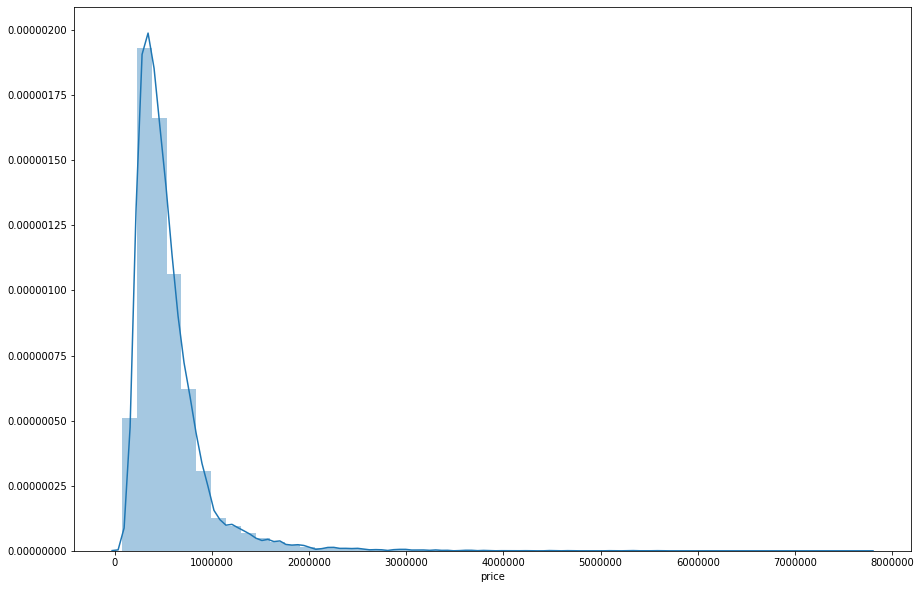

In [30]:
target = 'price'
sns.distplot(house_data[target])

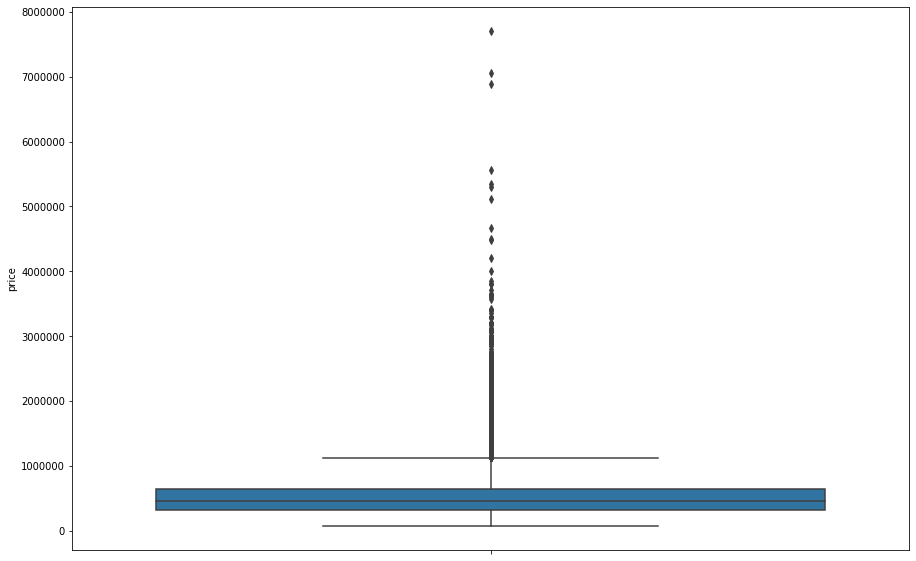

In [36]:
# Box Plot
sns.boxplot(y=house_data[target])

In [61]:
z = np.abs(stats.zscore(house_data['price']))
print(z)

[0.86671627 0.00625157 0.98077344 ... 0.37618606 0.38190525 0.58606486]


In [ ]:
sns.distplot(house_data[target])

In [63]:
def find_outliers_Z(col):
    zscore = np.abs(stats.zscore(col))
    idx_outliers = zscore > 3
    return idx_outliers

In [64]:
idx_outs_price = find_outliers_Z(house_data['price'])
idx_outs_price

array([False, False, False, ..., False, False, False])

In [66]:
house_data[idx_outs_price].describe

<bound method NDFrame.describe of                id        date      price  bedrooms  bathrooms  sqft_living  \
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
153    7855801670    4/1/2015  2250000.0         4       3.25         5180   
246    2025069065   9/29/2014  2400000.0         4       2.50         3650   
269    7960900060    5/4/2015  2900000.0         4       3.25         5050   
282    7424700045   5/13/2015  2050000.0         5       3.00         3830   
300    3225069065   6/24/2014  3080000.0         4       5.00         4550   
312    1860600135    5/2/2014  2380000.0         5       2.50         3650   
518    4386700135  11/14/2014  2250000.0         4       2.25         4760   
540     622049114   2/18/2015  2130000.0         3       2.50         5403   
556    5486800070   6/20/2014  1950000.0         7       3.50         4640   
656    3760500116  11/20/2014  3070000.0         3       2.50         3930   
779    1954700695   6/12/2014 

In [67]:
house_data[idx_outs_price].shape

(406, 21)

In [70]:
#Vizuals to understand all of data
from ipywidgets import interact

In [ ]:
num

In [21]:
plt.rcParams['figure.figsize'] = (15,10)

In [ ]:
# Need to remove outliers

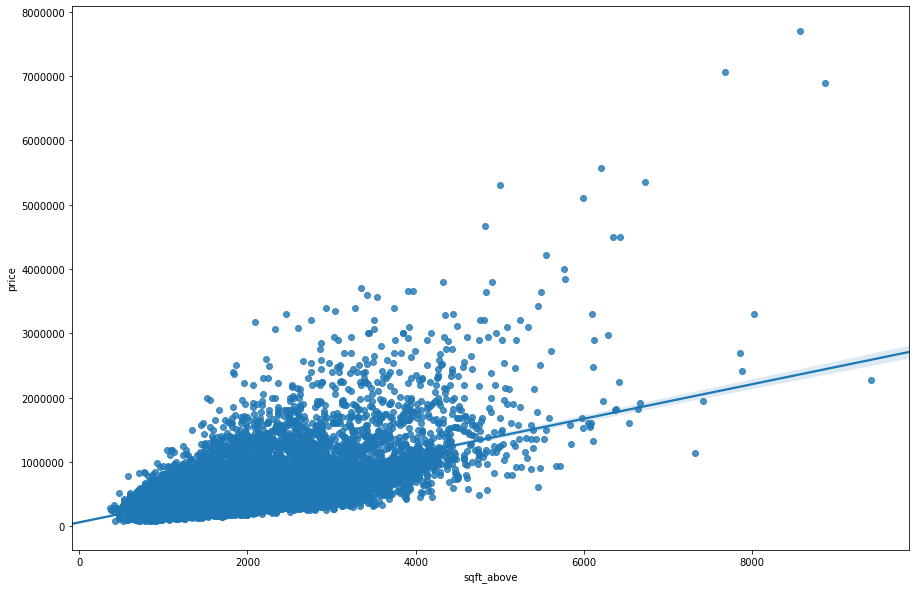

In [29]:
sns.regplot(data=house_data, x='sqft_above', y=target)

In [40]:
# Making a function for use in making plots to understand data
def plot_viz(house_data,col,target='price'):
    g= sns.jointplot(data=house_data, x=col, y=target, kind='reg')
    plt.subtitle(f"{col} vs {target})
    return g

SyntaxError: EOL while scanning string literal (<ipython-input-40-02de99b27c34>, line 4)

In [ ]:
for col in num_cols:
    plot_viz(data,col)

# Date

# Number of Bedrooms

# Number of Bathrooms

# Living Space Square Footage

# Square Foot Above Hround

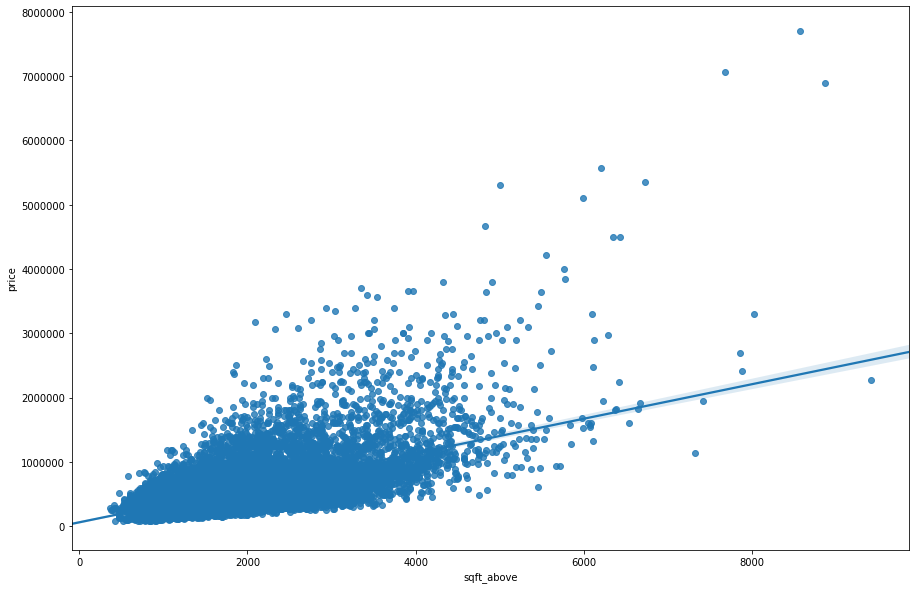

In [32]:
sns.regplot(data=house_data, x='sqft_above', y=target)

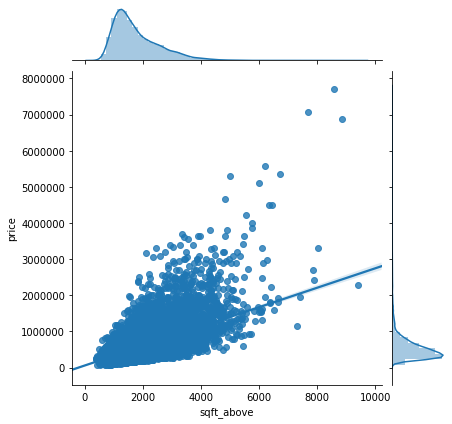

In [33]:
sns.jointplot(data=house_data, x='sqft_above',y=target, kind='reg')

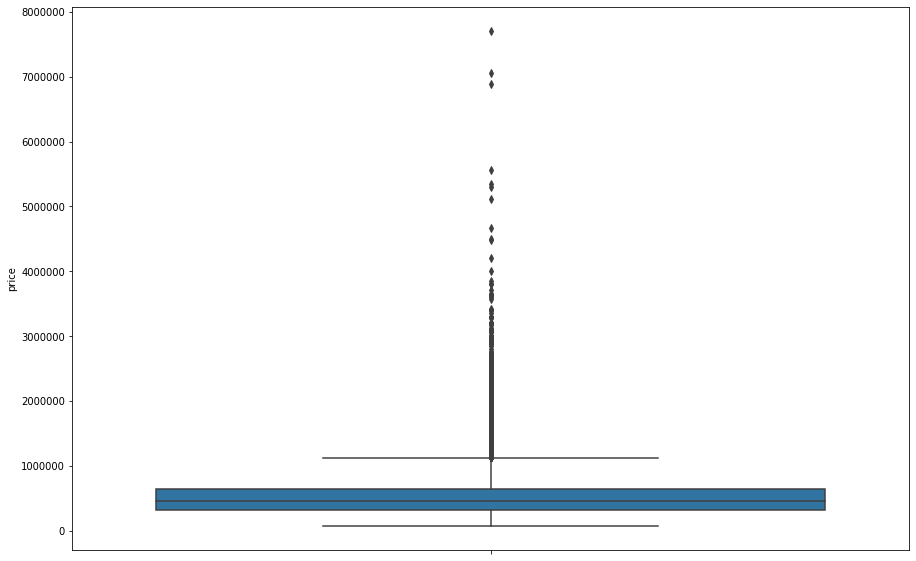